In [1]:
import os
import torch

os.environ["MKL_NUM_THREADS"]="1"
os.environ["NUMEXPR_NUM_THREADS"]="1"
os.environ["OMP_NUM_THREADS"]="1"

import sys

import pytorch_lightning as pl
from omegaconf import DictConfig, OmegaConf
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from spatial.merfish_dataset import FilteredMerfishDataset, MerfishDataset
from spatial.models.monet_ae import MonetAutoencoder2D, TrivialAutoencoder
from spatial.train import train
from spatial.predict import test

In [2]:
rad_to_neighbors = {}

for radius in range(100):
    data = MerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]/2/graph.x.shape[0]
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]/2/graph.x.shape[0]
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius])

27.235872235872236
26.5416
29.56035889070147
31.6969111969112
27.3325
24.461916461916463
32.102793599132085
28.71769547325103
31.033828382838283
31.683779355543418
22.90909090909091
26.457282343368593
32.66228070175438
28.391517128874387
25.547755102040817
25.822384428223845
26.00997506234414
24.874155405405407
31.22240943555181
30.160944795385884
26.606584362139916
21.27930174563591
31.84213467449008
26.93185550082102
31.566284779050736
29.71657754010695
24.331670822942645
25.958804523424877
31.8484344693821
25.728987993138936
26.3005733005733
24.167064439140812
26.395577395577394
26.176984126984127
31.770764119601328
30.784162771514985
27.08140531276778
23.55773955773956
32.39183342347215
28.376717865804366
32.460420032310175
30.27721943048576
24.68058968058968
27.16393442622951
32.360197368421055
27.686860068259385
26.797761790567545
25.54004576659039
25.53510895883777
27.282625482625484
31.821138211382113
31.35114503816794
27.418136020151135
24.02179176755448
33.33990410229089
26.8

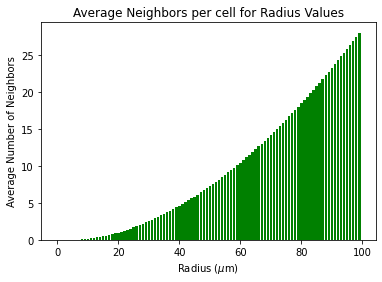

In [13]:
import matplotlib.pyplot as plt

plt.bar(list(rad_to_neighbors.keys()), rad_to_neighbors.values(), color='g')
plt.title("Average Neighbors per cell for Radius Values")
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Average Number of Neighbors")
plt.show()

In [ ]:
rad_to_neighbors = {}

for radius in range(100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

In [2]:
rad_to_neighbors = {}

for radius in range(95,100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

../data/raw/merfish_messi.hdf5
95 145594.6923076923 5399
../data/raw/merfish_messi.hdf5
96 148601.52662721893 5399
../data/raw/merfish_messi.hdf5
97 151629.68047337278 5399
../data/raw/merfish_messi.hdf5
98 154692.99408284025 5399
../data/raw/merfish_messi.hdf5
99 157778.9822485207 5399
